In [1]:
import statsmodels.api as sm
import pandas as pd
import statsmodels.tsa.stattools as ts
from matplotlib import pyplot as plt
import cointegracao
from scipy.stats import zscore
import seaborn as sns
from itertools import combinations, permutations
from multiprocessing import Pool


In [2]:
bd = pd.read_excel('BD COMPLETO.xlsx')

In [3]:
bd.dropna(axis=0, inplace=True)
bd.set_index('Data', inplace=True)
bd

,ARZZ3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BEEF3,BOVA11,BRAP4,...,SUZB3,TAEE11,TIET11,VVAR3,YDUQ3,NTCO3,ITSA4,BPAC11,BOVV11,dol
Data,,,,,,,,,,,,,,,,,,,,,
2017-04-11,28.5749,22.40,17.4028,28.1720,17.3703,17.6168,21.0011,9.78,62.42,17.2488,...,12.4039,16.4007,10.4669,3.9803,14.2525,14.7845,6.8240,15.8492,64.46,3.531422
2017-04-12,28.5031,22.96,17.3301,27.7085,17.2553,17.4412,20.7890,9.87,61.68,16.2195,...,12.2900,16.5075,10.3283,4.2291,14.5797,14.7213,6.7885,16.1625,64.00,3.519090
2017-04-13,28.7992,22.99,16.8300,26.2664,16.7844,16.9090,20.5403,9.95,60.80,16.3053,...,11.9958,16.2939,10.3822,4.2291,13.9166,14.5948,6.6179,15.5868,62.93,3.536467
2017-04-17,28.6646,22.85,17.7756,27.4853,17.4415,17.6662,21.2791,10.00,62.25,16.5540,...,11.8250,16.3865,10.4515,4.1793,14.7654,15.0277,6.7956,15.5783,64.44,3.483776
2017-04-18,28.2609,23.91,17.9120,27.7514,17.4470,17.5619,21.2060,9.95,61.95,16.1166,...,12.1476,16.5929,10.3052,4.3684,14.6769,14.9061,6.8525,15.2397,64.20,3.492744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-10,56.9600,26.10,56.0000,32.4254,19.3100,20.8500,26.2800,12.93,95.04,43.0300,...,46.3500,28.7300,14.9000,18.0200,27.3100,49.7500,9.4600,79.1300,99.20,5.325000
2020-09-11,55.7500,26.58,56.0200,31.8971,18.8700,20.4600,25.4700,12.93,94.48,44.9000,...,45.6000,28.3800,14.6500,17.9600,27.8900,51.6200,9.2700,78.1100,98.60,5.320500
2020-09-14,57.1700,28.25,58.7300,32.3600,19.1600,20.7000,25.8600,13.27,96.51,44.5500,...,46.1200,28.6000,14.7700,18.3700,30.1100,53.2600,9.3800,81.4800,100.72,5.273000


In [4]:
bd = bd.loc['2018-02-27': '2019-03-02']
bd[['PETR3', 'PETR4']]

,PETR3,PETR4
Data,,
2018-02-27,22.2914,20.0038
2018-02-28,22.3203,19.9665
2018-03-01,21.9540,19.5665
2018-03-02,22.3493,20.0131
2018-03-05,22.9856,20.5806
...,...,...
2019-02-25,29.6930,25.8945
2019-02-26,29.7027,25.7781
2019-02-27,29.8585,26.2630


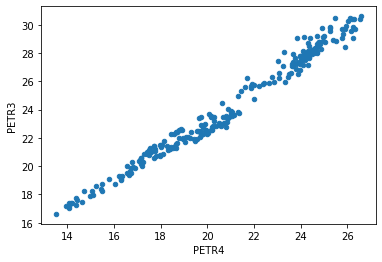

In [5]:
bd[['PETR3', 'PETR4']].plot(kind='scatter', x='PETR4', y='PETR3')

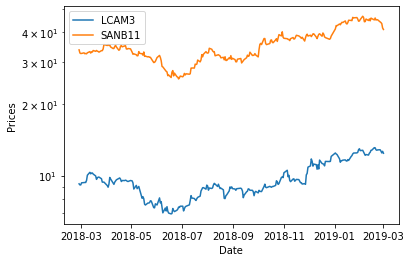

In [6]:
a = sns.lineplot(y='LCAM3', x=bd.index, data=bd, label='LCAM3')
a = sns.lineplot(y='SANB11', x=bd.index, data=bd, label='SANB11')

a.set(yscale='log')

plt.xlabel('Date')
plt.ylabel('Prices')
plt.show()

In [7]:
coint = cointegracao.Cointegration(significance = 0.01, z_score_in=2)

In [8]:
# i_1 = bd.apply(lambda col: coint.adf(col), axis=0)

In [9]:
i_1 = [coint.adf(bd[col]) for col in bd.columns]
i_1 = [ ele for ele in i_1 if ele is not None ]

In [10]:
permut = list(combinations(i_1, 2))[:500]

In [11]:
approved = []
for pair in permut:
    try:
        coint_test = coint.cointegration_test(first_stock=bd[pair[0]], scnd_stock=bd[pair[1]])
        if coint_test:
            approved.append(pair)
    except:
        pass

In [12]:
def cointegrated(pair):
    try:
        coint_test = coint.cointegration_test(first_stock=bd[pair[0]], scnd_stock=bd[pair[1]])
        if coint_test:
            approved.append(pair)
            return pair
    except:
        pass

In [187]:
def executar():
    if __name__ == '__main__':

        with Pool(3) as p:
            results = p.map(cointegrated, permut)

        return results

In [ ]:
results = executar()
print(results)

In [ ]:
len(permut)

In [ ]:
coint.cointegration_test(first_stock=bd['HGTX3'], scnd_stock=bd['LREN3'])

In [ ]:
coint.plot_prices()

In [ ]:
coint.plot_scatter()

In [ ]:
coint.plot_resid_bounds()

In [ ]:
ts.adfuller(coint.residuals)

In [13]:
Y = bd['PETR3']
X = bd['PETR4']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
reg = model.fit()

In [14]:
reg.params

const    1.751135
PETR4    1.074009
dtype: float64

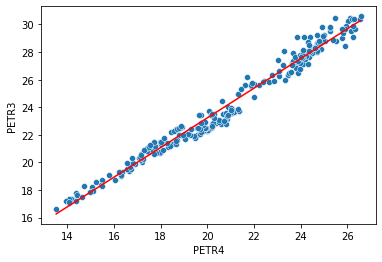

In [15]:
sns.scatterplot(x=bd['PETR4'], y=bd['PETR3'])
sns.lineplot(x=bd['PETR4'], y=reg.fittedvalues, color='red')
plt.show()

In [17]:
resid = reg.resid
resid_mean = resid.mean()
k = 2
upper = resid.std() * k
lower = resid.std() * -k

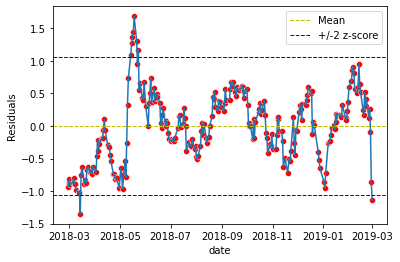

In [32]:
sns.lineplot(y=resid, x=resid.index)
sns.scatterplot(y=resid, x=resid.index, color='red')


plt.axhline(y=resid_mean, color='y', linestyle='--', linewidth=1, label='Mean')
plt.axhline(y=upper,   color='b', linestyle='--', linewidth=1, label=f'+/-{k} z-score')
plt.axhline(y=lower, color='b', linestyle='--', linewidth=1, label='_nolegend_')

plt.xlabel('date')
plt.ylabel('Residuals')

plt.legend()
plt.show()

In [33]:
28.4274-reg.predict([1, 25.8945])

array([-1.13466334])

In [21]:
bd[['PETR4','PETR3']]

,PETR4,PETR3
Data,,
2018-02-27,20.0038,22.2914
2018-02-28,19.9665,22.3203
2018-03-01,19.5665,21.9540
2018-03-02,20.0131,22.3493
2018-03-05,20.5806,22.9856
...,...,...
2019-02-25,25.8945,29.6930
2019-02-26,25.7781,29.7027
2019-02-27,26.2630,29.8585


In [18]:
adf_resid = ts.adfuller(resid)

In [19]:
resid_pvalue = adf_resid[1]
resid_pvalue

0.0028927625394583384

In [20]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PETR3   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.155e+04
Date:                Wed, 27 Jul 2022   Prob (F-statistic):          4.95e-210
Time:                        13:37:46   Log-Likelihood:                -197.09
No. Observations:                 250   AIC:                             398.2
Df Residuals:                     248   BIC:                             405.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7511      0.211      8.309      0.000       1.336       2.166
PETR4          1.0740      0.010    107.493      0.000       1.054       1.094
==============================================================================
Omnibus:                        0.194   Durbin-Watson:                   0.146
Prob(Omnibus):                  0.908   Jarque-Bera (JB):                0.260
Skew:                           0.065   Prob(JB):                        0.878
Kurtosis:                       2.909   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
dir(reg)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c

In [3]:
import backtest

In [4]:
res = backtest.executar()

In [69]:
from statsmodels.tsa.api import VAR
import numpy as np

In [19]:
def undiff(original_df, diff_serie, periods):
    
    """Opposite to differentiate to return in level values to compare"""
    restored = {}
    for index, value in diff_serie.items():
        
        date_offset = index - pd.DateOffset(days=periods)
        
        if date_offset in original_df.index:
            restored[index] = original_df.loc[date_offset] + value
        else:
            restored[index] = restored[date_offset] + value
        
    return pd.DataFrame(restored).T

In [2]:
df = pd.read_excel('database.xlsx')

In [49]:
df_model = df[['PETR3', 'PETR4']][:-10].dropna()
df_test = df[['PETR3', 'PETR4']][-10:]

In [63]:
var_model = VAR(df_model.values)

model_fitted = var_model.fit(252, trend='ct')

In [64]:
model_predict = model_fitted.forecast(y=df_model.values, steps=10)

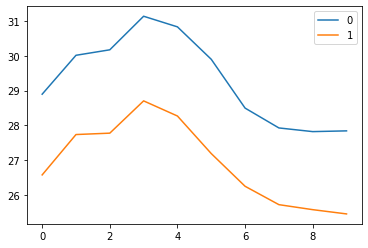

In [65]:
pd.DataFrame(model_predict).plot()

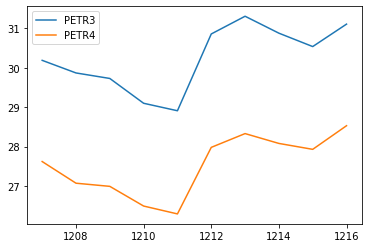

In [66]:
df_test.plot()

In [27]:
undiff(df_test[['PETR4']], pd.DataFrame(model_predict)[1], 10)

TypeError: unsupported operand type(s) for -: 'int' and 'DateOffset'

In [387]:
import backtest
from cointegracao import Cointegration
import pandas as pd
import numpy as np
import statsmodels.api as sm
from copy import deepcopy
import statsmodels.tsa.stattools as ts
from sklearn.linear_model import LinearRegression
from statsmodels.regression.rolling import RollingRegressionResults

In [399]:
df_prices = pd.read_excel('database.xlsx', index_col=0)

In [224]:
e = backtest.Executer(df_prices, [('PETR3', 'PETR4')], Cointegration())

In [225]:
# df_prices = df_prices.loc[:'2021-12-29'][-252:]

In [528]:
x = df_prices['PETR3'] #1
y = df_prices['PETR4'] #2

x = sm.add_constant(x)
model = sm.OLS(y, x)

reg = model.fit()

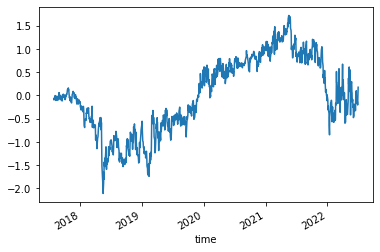

In [529]:
reg.resid.plot()

In [567]:
residual = reg.resid
residual_lag = reg.resid.diff().fillna(method='bfill')

x_res_lag = sm.add_constant(residual_lag)

model = sm.OLS(x_res_lag, reg.resid)

res = model.fit()

In [568]:
halflife = round(np.log(2)/(res.params[1])).item()
halflife

60.0

In [118]:
np.log(2)

0.6931471805599453

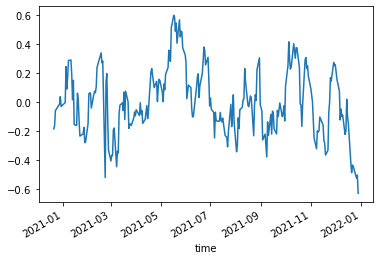

In [119]:
reg.resid.plot()

In [55]:
e.backtest(('PETR3', 'PETR4'))

[{'date': Timestamp('2019-03-08 00:00:00'),
  'pair': ('PETR3', 'PETR4'),
  'status': True,
  'price_fst_stock': 19.42,
  'price_scnd_stock': 17.43,
  'beta_open': 1.0947309466742494,
  'beta_close': None,
  'last_residual': -0.8202796626091349,
  'std_residual': 0.37707610856726015,
  'std_open_residual': 0.37707610856726015,
  'residual_open': -0.8202796626091349,
  'open_price_first_stock': 19.42,
  'open_price_scnd_stock': 17.43,
  'open_date': Timestamp('2019-03-08 00:00:00'),
  'close_limit': 0.18853805428359513,
  'stop_limit': 1.7541522171344854,
  'halflife': 10.0,
  'days_open': 0},
 {'date': Timestamp('2019-03-11 00:00:00'),
  'pair': ('PETR3', 'PETR4'),
  'status': True,
  'price_fst_stock': 20.52,
  'price_scnd_stock': 18.13,
  'beta_open': 1.0947309466742494,
  'beta_close': None,
  'last_residual': -0.48024879401475573,
  'std_residual': 0.3762621198681272,
  'std_open_residual': 0.37707610856726015,
  'residual_open': -0.8202796626091349,
  'open_price_first_stock': 19.

In [327]:
d = backtest.Cointegration()

In [328]:
d.cointegration_test(df_prices['PETR3'], df_prices['PETR4'])

True

In [329]:
d.reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PETR3   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.365e+04
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          1.43e-249
Time:                        20:21:37   Log-Likelihood:                -30.212
No. Observations:                 252   AIC:                             64.42
Df Residuals:                     250   BIC:                             71.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0659      0.150    -20.450      0.000      -3.361      -2.771
PETR4          1.1972      0.008    153.776      0.000       1.182       1.212
==============================================================================
Omnibus:                        1.215   Durbin-Watson:                   0.331
Prob(Omnibus):                  0.545   Jarque-Bera (JB):                0.936
Skew:                          -0.126   Prob(JB):                        0.626
Kurtosis:                       3.159   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [493]:
from arch.unitroot import engle_granger, ADF

d.residuals.plot()

In [380]:
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.adfvalues import mackinnonp
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS


In [524]:
arch_coint = engle_granger(df_prices['ELET3'], df_prices['ELET6'], trend='c')
arch_coint.cointegrating_vector[1]

-1.11302835792929

In [526]:
s_reg.params

const   -3.594595
ELET6    1.113028
dtype: float64

In [507]:
aa = ADF(arch_coint.resid, method='BIC')
aa.pvalue

1.471266681642102e-06

In [505]:
ts.adfuller(s_reg.resid, autolag='BIC')

(-5.570491448014227,
 1.4712666816421648e-06,
 1,
 1215,
 {'1%': -3.435743555099632,
  '5%': -2.8639217381867486,
  '10%': -2.568038075665972},
 339.9981085441376)

In [502]:
coin = coint(df_prices['ELET3'], df_prices['ELET6'], autolag='BIC', trend='c')
coin[1]

1.2716170350117677e-05

In [503]:
y= df_prices['ELET3']
x = df_prices['ELET6']
x = sm.add_constant(x)
s_reg = sm.OLS(y,x).fit()
add = ts.adfuller(s_reg.resid, autolag='BIC')
mackinnonp(add[0], N=2, regression='c')

1.2908459448336375e-05

In [504]:
reg = LinearRegression().fit(df_prices[['ELET6']], df_prices[['ELET3']])
resi = df_prices[['ELET3']].values - reg.predict(df_prices[['ELET6']])
ad = ts.adfuller(resi, autolag='BIC')
mackinnonp(ad[0], N=2, regression='c')

1.290845944833645e-05

In [586]:
df_prices['ELET3'].pct_change().sort_values().quantile(0.1)

-0.034863664934051575

In [592]:
arch_coint.resid.sort_values().quantile(0.95)

1.176293121487808